In [1]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

# Exploratory data analysis

---

## Elements of structured data

### Key terms for data types

**Continuous** - data can take on any value in an interval

**Discrete** - data can take on only integer values

**Categorical** - data can take on only specific set of values representing categories

**Binary** - data can be just true or false, 0 or 1, etc.

**Ordinal** - categorical data with an explicit ordering

---

## Rectangular data

**Data frame** - rectangular 2d data, like a spreadsheet. basic data structure

**Feature** - column in the table

**Outcome** - predicting an outcome from the features

**Records** - a row in the table

### Indexing

Traditionally a column is designated as the index

Some data structures (e.g. pandas) can have hierarchical indices

### Nonrectangular data structures

Time series

Spatial data structures
- object representation
- field view

Graph/network data structures

---


## Estimates of location

**Mean** - sum of all values divided by count of values

**Weighted mean** - sum of all values times a weight, divided by sum of the weights

**Median** - value where 1/2 the data is above/below

**Weighted median** - value where 1/2 the sum of the weights lies above/below the sorted data

**Trimmed mean** - avg. of all values after dropping fixed number of extreme values

**Robust** - data that is not sensitive to extreme values

**Outlier** - data that is very different from most of the data

### Mean

### $ \bar{x} = \frac{\sum_{i}^n x_{i}}{n}  $

In [2]:
def mean(x):
    sum_x = sum(x)
    n = len(x)
    return sum_x / n

print(mean([1,2,3]))
print(mean([1,2,5]))

2.0
2.6666666666666665


#### numpy.mean()

In [3]:
print(np.mean([1,2,3]))
print(np.mean([1,2,5]))

2.0
2.66666666667


### Trimmed mean

### $ \bar{x} = \frac{ \sum_{i = p + 1}^{n - p} x_{i} } {n - 2p}  $ 


In [4]:
def trimmed_mean(x, p):
    x = sorted(x)
    n = len(x)
    sum_x = sum( x[ p : n - p ] )
    return sum_x / (n - 2*p)

print(trimmed_mean([1,2,3,4,900], 1))
# is equivalent to ->
print(mean([2,3,4]))

# or use a percentage ->
values = [i*i for i in range(100)]
print(trimmed_mean(values, int(len(values)*0.1)))

3.0
3.0
2983.5


### Weighted mean

### $ \bar{x_{w}} = \frac{ \sum_{i = 1}^{n} w_{i} x_{i} }{ \sum_{i}^{n} w_{i} }   $

In [5]:
def weighted_mean(x, w):
    n = len(x)
    sum_w_x = sum([w[i] * x[i] for i in range(n)])
    sum_w = sum(w)
    return sum_w_x / sum_w
        
print(weighted_mean([1,2,3],[1,1,500]))
## the last figure is weighted 500x the others

2.99402390438247


#### numpy.average()

In [6]:
np.average([1,2,3], weights=[1,1,500])

2.9940239043824701

### Median and robust estimates

In [7]:
def median(x):
    x = sorted(x)
    n = len(x)
    odd = n % 2
    if odd:
        ## return mid
        return x[n//2]
    else:
        # return avg. of middle 2
        return np.mean([x[n//2-1],x[n//2]])
        
print(median([1,2,3,4,500]))
print(median([1,2,3,4]))

3
2.5


#### numpy.median()

In [8]:
print(np.median([1,2,3,4,500]))
print(np.median([1,2,3,4]))

3.0
2.5


Also weighted median (not shown)

### Outliers

Can avoid outliers using median, but also trimmed mean

Common choice is to trim top and bottom 10% before calculating mean

Trimmed mean is a "compromise" between mean and median

---

## Estimates of Variability

**Variability** - also known as dispersion, how spread out is the data

**Deviations** - diff. b/w observed values and estimate of location

**Variance** - sum of squared deviations from the mean, divided by n - 1

**Standard deviation** - square root of the variance

**Mean absolute deviation** - mean of the abs values of the deviations from the mean

**Median abs deviation from the median** - median of the abs value of the deviations from the median

**Range** - diff. b/w max and min

**Order statistics** - metrics based on the data values sorted

**Percentile** - value such that P percent of the values are this value or less

**Interquartile range** - diff. b/w 75th and 25th percentile


### Mean abs deviation 

### $ \frac{ \sum_{i = 1}^n \mid x_i - \bar{x} \mid }{ n }  $ 

In [9]:
def mean_abs_deviation(x):
    n = len(x)
    mean_x = np.mean(x)
    sum_abs_deviations = sum([abs(x[i] - mean_x) for i in range(n)])
    return sum_abs_deviations / n

mean_abs_deviation([1,2,6])

2.0

### Variance

### $ s^2 = \frac{ \sum (x - \bar{x})^2 }{ n - 1 } $

In [10]:
def variance(x, sample=True):
    n = len(x)
    mean_x = np.mean(x)
    sum_squared_deviations = sum([ (x[i] - mean_x)**2 for i in range(n) ])
    denominator = (n - 1) if sample else n
    return sum_squared_deviations / denominator

print(variance([1,2,6], sample=False))
print(variance([1,2,6], sample=True))

4.66666666667
7.0


#### numpy.var()

In [11]:
print(np.var([1,2,6], ddof=0))
print(np.var([1,2,6], ddof=1))

4.66666666667
7.0


### Standard deviation

### $ s = \sqrt{Variance} $ 

In [12]:
def standard_deviation(x):
    return math.sqrt(np.var(x, ddof=1))

standard_deviation([1,2,6]) # sample=True, e.g. ddof=1

2.6457513110645907

#### numpy.std()

In [13]:
print(np.std([1,2,6], ddof=0))
print(np.std([1,2,6], ddof=1))

2.16024689947
2.64575131106


### Estimates based on percentiles

In [2]:
### todo

---

## Exploring the data distribution

**Boxplot** - box and whiskers, quick way to vizualize data distribution

**Frequency table** - tally of the count of numeric data values that fall into a set of bins/intervals

**Histogram** - plot of the frequency table w/ the bins on the x-axis and the count (or proportion) on y-axis

**Density plot** - smoothed version of the histogram, often based on *kernel density estimate*

### Percentiles

#### numpy.percentile()

In [14]:
# 50th percentile
x = np.arange(0,11)
np.percentile(x, 50)

5.0

#### pandas.DataFrame.describe()

In [15]:
df = pd.DataFrame(x)
df.describe()

,0
count,11.000000
mean,5.000000
std,3.316625
min,0.000000
25%,2.500000
50%,5.000000
75%,7.500000
max,10.000000


### Boxplot

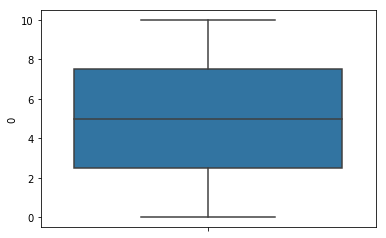

In [16]:
sns.boxplot(y=df[0])

### Frequency table and histogram and density estimates

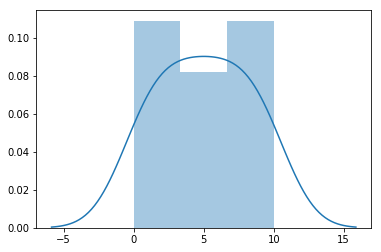

In [17]:
sns.distplot(df)

---

## Exploring binary and categorical data

**Mode** - most common category/value

**Expected value** - if categories are numeric, an average value based on category's probability of occurence

**Bar charts** - frequency/proportion of categories plotted as bars

**Pie charts** - frequency/proportion of categories plotted as pie

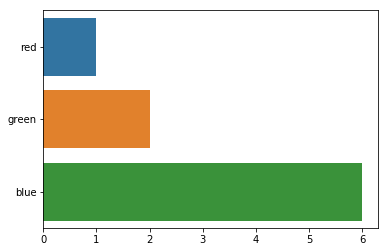

In [18]:
sns.barplot(x=[1,2,6], y=['red','green','blue'])

### Numerical data as categorical data

Converting numeric data to categorical is an important step

Reduces complexity

### Expected value

- Multiply each outcome by its probability of occurring
- Sum these values

EV is a form of weighted mean

Where the weights are the expectation probabilities

---

## Correlation

Correlation among predictors, and between predictors and a target variable

**Correlation coefficient** - measure extent to which numeric variables are associated (from -1 to 1)

**Correlation matrix** - table showing correlations between all variables

**Coefficient of determination** - proportion of the variance in the dependent variable that is predictable from the independent variable

**Scatterplot** - a plot where x-axis is one variable, y-axis is another

### Pearson's correlation coefficient

### $ r = \frac{\sum_{i = 1}^N (x_{i} - \bar{x})(y_{i} - \bar{y})  }{(N - 1)s_{x}s_{y}}  $

In [19]:
def pearsons_correlation_coefficient(x, y, sample=True):
    N = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sum_deviations_from_mean = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(N)])
    s_x = np.std(x, ddof=1 if sample else 0)
    s_y = np.std(y, ddof=1 if sample else 0)
    denominator = (N - 1) if sample else N
    return sum_deviations_from_mean / ( denominator * s_x * s_y )

x, y = [1,2,6,10,15,60], [1,5,9,18,50,76]
pearsons_correlation_coefficient(x=x, y=y)

0.91539011091733158

#### stats.linregress()

In [20]:
x, y = [1,2,6,10,15,60], [1,5,9,18,50,76]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.91539011091733147

### Correlation matrix

In [21]:
df = pd.DataFrame({'A': [1,2,6,10,15,60], 'B': [1,5,9,18,50,76], 'C': [3,9,16,44,68,99]})
print( df['A'].corr(df['B']) )
df.corr()

0.915390110917


,A,B,C
A,1.000000,0.915390,0.891229
B,0.915390,1.000000,0.980945
C,0.891229,0.980945,1.000000


#### numpy.corrcoef()

In [22]:
np.corrcoef(df['A'], y=df['B'])

array([[ 1.        ,  0.91539011],
       [ 0.91539011,  1.        ]])

### Coefficient of determination

$ r^2 $

In [23]:
def r_squared(x, y):
    return pearsons_correlation_coefficient(x, y)**2

x, y = [1,2,6,10,15,60], [1,5,9,18,50,76]
r_squared(x=x, y=y)

0.83793905516524458

In [24]:
x, y = [1,2,6,10,15,60], [1,5,9,18,50,76]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value**2

0.83793905516524436

### Scatter plot w/ linear regression fit

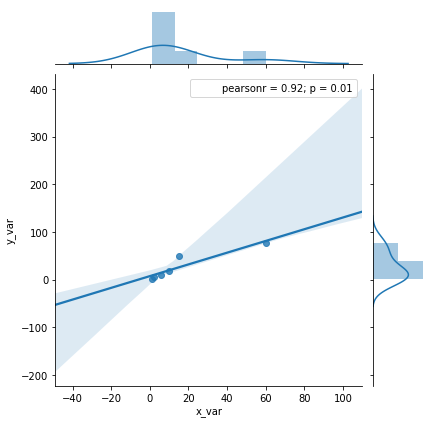

In [25]:
x, y = pd.Series([1,2,6,10,15,60], name="x_var"), pd.Series([1,5,9,18,50,76], name="y_var")

sns.jointplot(x, y, kind="reg")

---

## Exploring 2 or more variables

"Bivariate analysis"

**Contingency tables** - tally of counts b/w 2 or more categorical variables

**Hexagonal binning** - plot of 2 numeric variables, with records binned into hexagons

**Contour plots** - plot showing density of 2 numeric variables (like a topographical map)

**Violin plots** - like a boxplot, but showing the density estimate

### Hexagonal binning

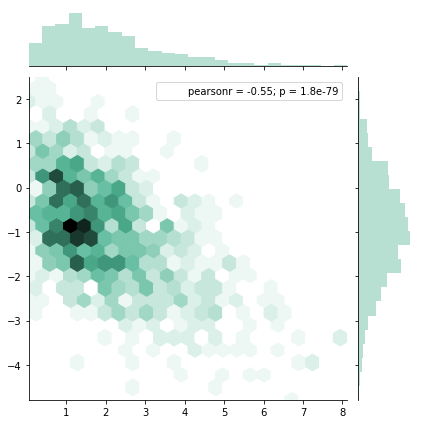

In [26]:
# generate a random dataset (from seaborn docs)
import numpy as np
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

### Contour plot / kernel density estimate plot

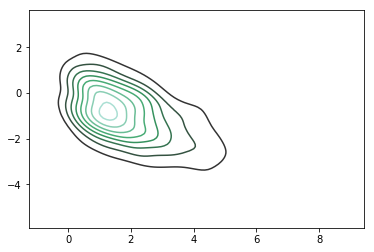

In [27]:
ax = sns.kdeplot(x, y)

### Cross table / contingency tables

In [28]:
# generate a dataset (from pandas docs)
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
              dtype=object)

pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

### Boxplots

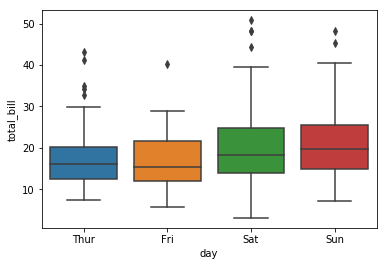

In [29]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", data=tips)

### Violin plots

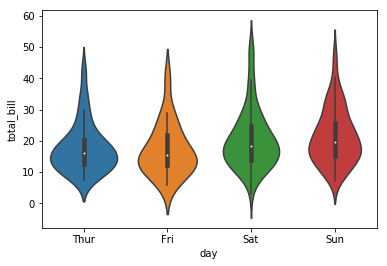

In [30]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

### Facet grids

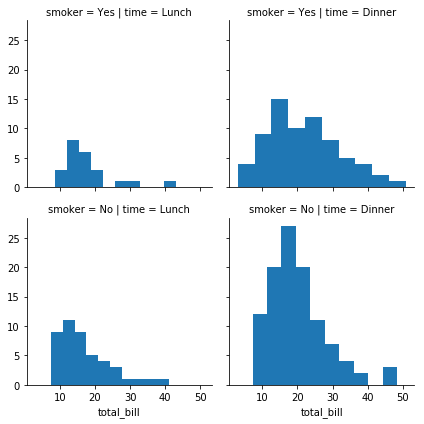

In [31]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

### Facet grid hexbins

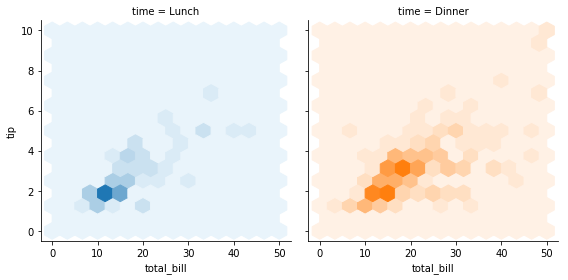

In [32]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])